https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20Normalization%20And%20Standardization-%20Day%205.ipynb

Why Should we Use Feature Scaling?
The first question we need to address – why do we need to scale the variables in our dataset? Some machine learning algorithms are sensitive to feature scaling while others are virtually invariant to it. Let me explain that in more detail.
Gradient Descent Based Algorithms
Machine learning algorithms like linear regression, logistic regression, neural network, etc. that use gradient descent as an optimization technique require data to be scaled. Take a look at the formula for gradient descent below:

Gradient descent formula

The presence of feature value X in the formula will affect the step size of the gradient descent. The difference in ranges of features will cause different step sizes for each feature. To ensure that the gradient descent moves smoothly towards the minima and that the steps for gradient descent are updated at the same rate for all the features, we scale the data before feeding it to the model.

Having features on a similar scale can help the gradient descent converge more quickly towards the minima.

Distance-Based Algorithms
Distance algorithms like KNN, K-means, and SVM are most affected by the range of features. This is because behind the scenes they are using distances between data points to determine their similarity.

For example, let’s say we have data containing high school CGPA scores of students (ranging from 0 to 5) and their future incomes (in thousands Rupees):

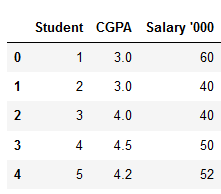

Since both the features have different scales, there is a chance that higher weightage is given to features with higher magnitude. This will impact the performance of the machine learning algorithm and obviously, we do not want our algorithm to be biassed towards one feature.

Therefore, we scale our data before employing a distance based algorithm so that all the features contribute equally to the result.

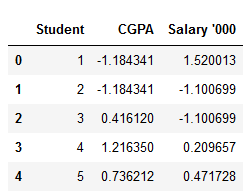

https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Feature scaling: Unscaled Knn example


## Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

In [1]:
# C:\Users\52054867\machine learning\titanic.csv
import pandas as  pd

In [2]:
import numpy as np

In [4]:
df = pd.read_csv(r'C:\Users\52054867\machine learning\titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
## seprate the columns 
df_int_cols = df.select_dtypes(include=np.number)

In [10]:
df_int_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [11]:
df_int_cols.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [15]:
df_int_cols['Age'].fillna(df_int_cols.Age.median(),inplace=True)

C:\Users\52054867\AppData\Local\Continuum\anaconda2\envs\mjain_env\lib\site-packages\pandas\core\series.py:4523: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [16]:
df_int_cols.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [17]:
df_int_cols.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [18]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()

In [19]:
SS.fit_transform(df_int_cols)

array([[-1.73010796, -0.78927234,  0.82737724, ...,  0.43279337,
        -0.47367361, -0.50244517],
       [-1.72622007,  1.2669898 , -1.56610693, ...,  0.43279337,
        -0.47367361,  0.78684529],
       [-1.72233219,  1.2669898 ,  0.82737724, ..., -0.4745452 ,
        -0.47367361, -0.48885426],
       ...,
       [ 1.72233219, -0.78927234,  0.82737724, ...,  0.43279337,
         2.00893337, -0.17626324],
       [ 1.72622007,  1.2669898 , -1.56610693, ..., -0.4745452 ,
        -0.47367361, -0.04438104],
       [ 1.73010796, -0.78927234,  0.82737724, ..., -0.4745452 ,
        -0.47367361, -0.49237783]])

## Normalization

Normalization is a scaling technique in which values are shifted and rescaled so that they end up ranging between 0 and 1. It is also known as Min-Max scaling.

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
norm = MinMaxScaler()

In [23]:
norm.fit_transform(df_int_cols)

array([[0.        , 0.        , 1.        , ..., 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 1.        , 0.        , ..., 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 1.        , ..., 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 0.        , 1.        , ..., 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 1.        , 0.        , ..., 0.        , 0.        ,
        0.0585561 ],
       [1.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.01512699]])

## Robust Scaler
It is used to scale the feature to median and quantiles 
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. 

The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 
1-10 precentile---10% of all values in this group is less than 1 
4-40%

In [24]:
from sklearn.preprocessing import RobustScaler

In [26]:
scaler = RobustScaler()

In [28]:
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df_int_cols),columns=df_int_cols.columns)
df_robust_scaler.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,-1.000000,0.0,0.0,-0.461538,1.0,0.0,-0.312011
1,-0.997753,1.0,-2.0,0.769231,1.0,0.0,2.461242
2,-0.995506,1.0,0.0,-0.153846,0.0,0.0,-0.282777
3,-0.993258,1.0,-2.0,0.538462,1.0,0.0,1.673732
4,-0.991011,0.0,0.0,0.538462,0.0,0.0,-0.277363


## Guassian Transformation
Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

In [31]:
df = pd.read_csv(r'C:\Users\52054867\machine learning\titanic.csv',usecols=['Age','Fare','Survived'])

In [32]:
df

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [33]:
df['Age']=df['Age'].fillna(df['Age'].median())


In [36]:
import matplotlib.pyplot as plt

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

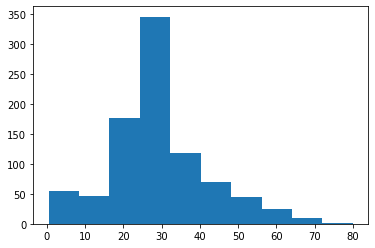

In [37]:
plt.hist(df['Age']) ## Age data is normally distributed

# Logarithmic Transformation

(array([  2.,  12.,  10.,   6.,  14.,  18.,  38., 237., 465.,  89.]),
 array([-0.86750057, -0.34254785,  0.18240487,  0.70735759,  1.23231031,
         1.75726303,  2.28221575,  2.80716847,  3.33212119,  3.85707391,
         4.38202663]),
 <BarContainer object of 10 artists>)

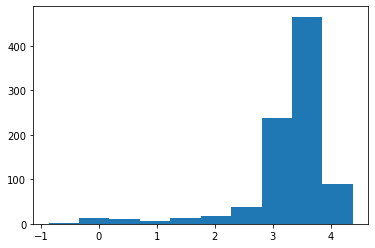

In [38]:
df['Age_log'] = np.log(df['Age'])
plt.hist(df['Age_log'] )

In [39]:
df['Age_log']

0      3.091042
1      3.637586
2      3.258097
3      3.555348
4      3.555348
         ...   
886    3.295837
887    2.944439
888    3.332205
889    3.258097
890    3.465736
Name: Age_log, Length: 891, dtype: float64

## Reciprocal Trnasformation

(array([851.,  16.,  10.,   0.,   8.,   4.,   1.,   0.,   0.,   1.]),
 array([0.0125    , 0.24934524, 0.48619048, 0.72303571, 0.95988095,
        1.19672619, 1.43357143, 1.67041667, 1.9072619 , 2.14410714,
        2.38095238]),
 <BarContainer object of 10 artists>)

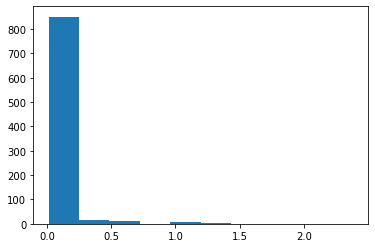

In [40]:
df['Age_reciprocal'] = 1/df['Age']
plt.hist(df['Age_reciprocal'] )

(array([ 24.,  20.,  18.,  21., 163., 359., 144.,  92.,  42.,   8.]),
 array([0.64807407, 1.47769385, 2.30731364, 3.13693342, 3.96655321,
        4.79617299, 5.62579277, 6.45541256, 7.28503234, 8.11465213,
        8.94427191]),
 <BarContainer object of 10 artists>)

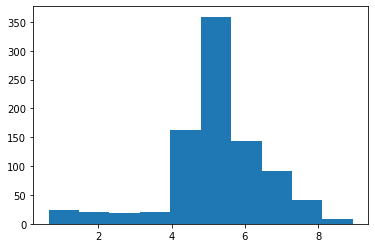

In [42]:
## square root transformation

df['Age_sqaure']=df.Age**(1/2)
plt.hist(df['Age_sqaure'])

(array([ 44.,  25.,  95., 173., 337.,  93.,  73.,  32.,  15.,   4.]),
 array([ 0.4853344 ,  4.2907709 ,  8.09620739, 11.90164389, 15.70708038,
        19.51251688, 23.31795338, 27.12338987, 30.92882637, 34.73426286,
        38.53969936]),
 <BarContainer object of 10 artists>)

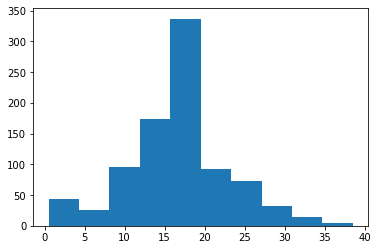

In [43]:

#### Exponential Transdormation
df['Age_exponential']=df.Age**(1/1.2)
plt.hist(df['Age_exponential'])

## BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected.

In [45]:
import scipy.stats as stat
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

In [46]:
print(parameters)

0.7964531473656952


(array([ 44.,  24.,  71., 180., 336., 107.,  72.,  35.,  17.,   5.]),
 array([-0.62638581,  3.42751514,  7.4814161 , 11.53531705, 15.589218  ,
        19.64311896, 23.69701991, 27.75092086, 31.80482182, 35.85872277,
        39.91262372]),
 <BarContainer object of 10 artists>)

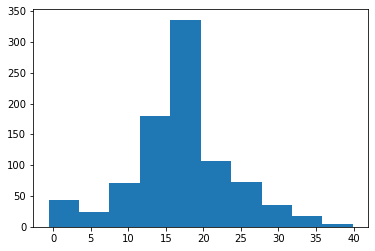

In [47]:
plt.hist(df['Age_Boxcox'])